# Salary (Adult) Datatset from UCI
Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


Attribute Information:

Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('adult_data.csv',header=None)
train.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Salary_Class']
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test=pd.read_csv('adult_test.csv',header=None)
test.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','Salary_Class']
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


Replacing '?' with NaN

In [4]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

In [5]:
train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
Salary_Class         0
dtype: int64

In [6]:
test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
Salary_Class        0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
train['Salary_Class']=le.fit_transform(train['Salary_Class'])

In [9]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [10]:
test['Salary_Class']=le.fit_transform(test['Salary_Class'])

In [11]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


(array([2862., 2796., 3072., 2994., 1998., 1285.,  861.,  281.,  103.,
          29.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

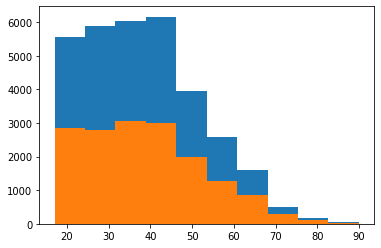

In [12]:
plt.hist(train['age'])
plt.hist(test['age'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

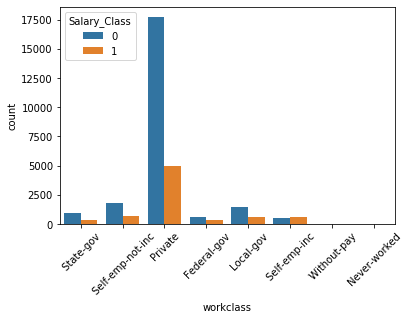

In [13]:
sns.countplot(train['workclass'],hue=train['Salary_Class'])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

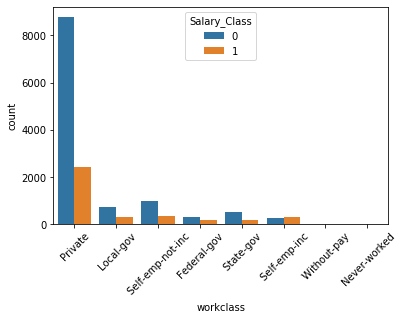

In [14]:
sns.countplot(test['workclass'],hue=test['Salary_Class'])
plt.xticks(rotation=45)

In [15]:
train['workclass'].describe()

count        30725
unique           8
top        Private
freq         22696
Name: workclass, dtype: object

In [16]:
train['workclass'].isnull().sum()

1836

In [17]:
train['workclass'].fillna(train['workclass'].mode()[0],inplace = True)
test['workclass'].fillna(test['workclass'].mode()[0],inplace = True)

In [18]:
train['workclass'].isnull().sum()

0

In [19]:
train['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [20]:
train['fnlwgt'].skew()

1.4469800945789826

In [21]:
train['fnlwgt'] = train['fnlwgt'].apply(lambda x: np.log1p(x))
test['fnlwgt'] = test['fnlwgt'].apply(lambda x: np.log1p(x))

In [22]:
train.head(1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
0,39,State-gov,11.258253,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

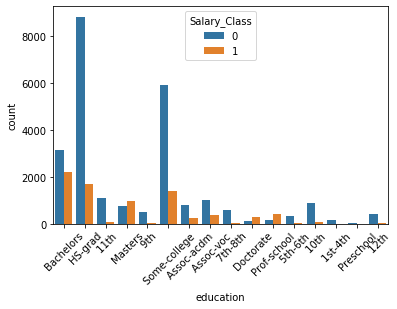

In [23]:
sns.countplot(train['education'],hue=train['Salary_Class'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

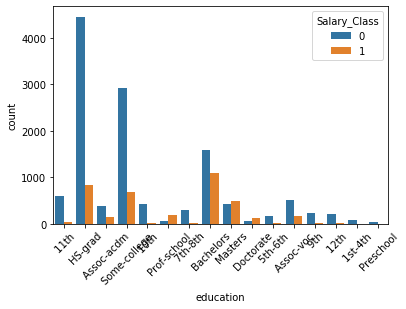

In [24]:
sns.countplot(test['education'],hue=test['Salary_Class'])
plt.xticks(rotation=45)

In [25]:
def School(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return ' School'
    else:
        return x

In [26]:
train['education'] = train['education'].apply(School)
test['education'] = test['education'].apply(School)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

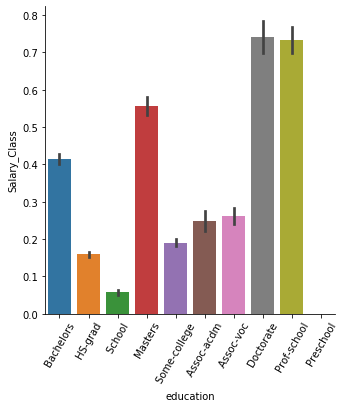

In [27]:
sns.catplot(x="education",y="Salary_Class",data=train,kind="bar")
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

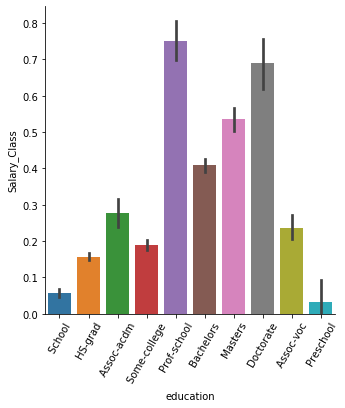

In [28]:
sns.catplot(x="education",y="Salary_Class",data=test,kind="bar")
plt.xticks(rotation=60)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

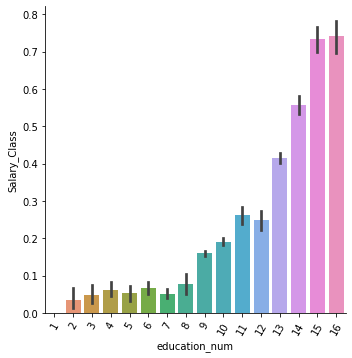

In [29]:
sns.factorplot(x="education_num",y="Salary_Class",data=train,kind="bar")
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

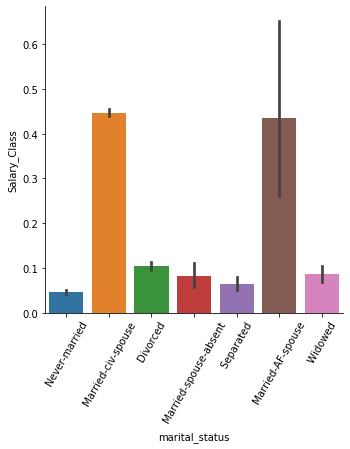

In [30]:
sns.catplot(x="marital_status",y="Salary_Class",data=train,kind="bar")
plt.xticks(rotation=60)

In [31]:
train['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

 The following can be merged into one:
 
 Married-spouse-absent      418;
 Married-AF-spouse           23

In [32]:
train['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)
test['marital_status'].replace(' Married-AF-spouse', ' Married-civ-spouse', inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

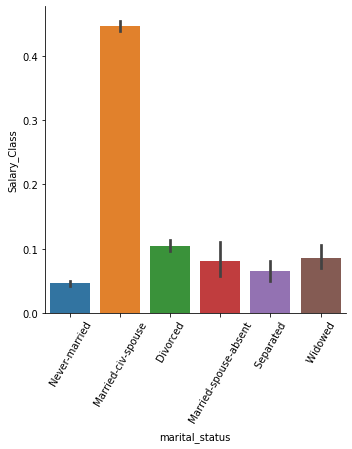

In [33]:
sns.catplot(x="marital_status",y="Salary_Class",data=train,kind="bar")
plt.xticks(rotation=60)

In [34]:
train['occupation'].describe()

count               30718
unique                 14
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [35]:
train['occupation'].fillna(train['occupation'].mode()[0],inplace=True)
test['occupation'].fillna(test['occupation'].mode()[0],inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

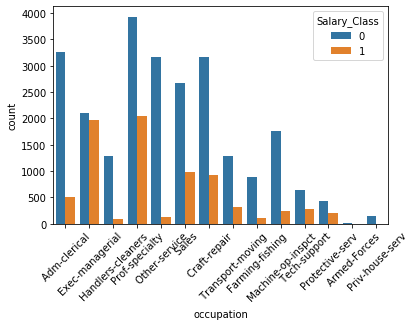

In [36]:
sns.countplot(train['occupation'],hue=train['Salary_Class'])
plt.xticks(rotation=45)

In [37]:
test['occupation'].isnull().sum()

0

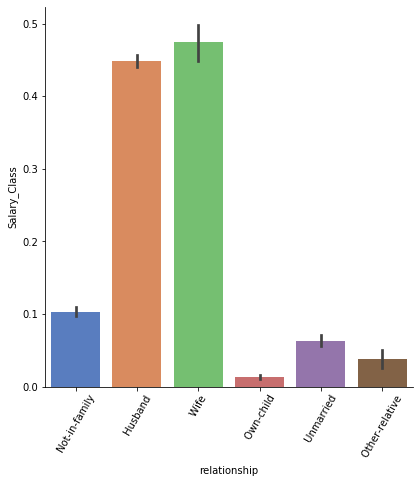

In [38]:
sns.catplot(x="relationship",y="Salary_Class",data=train,kind="bar", height = 6, palette = "muted")
plt.xticks(rotation=60);

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

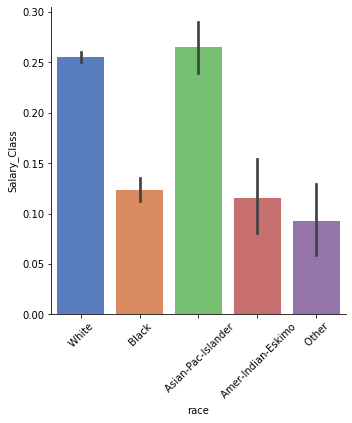

In [39]:
sns.catplot(x="race",y="Salary_Class",data=train,kind="bar", height = 5,palette='muted')
plt.xticks(rotation=45)

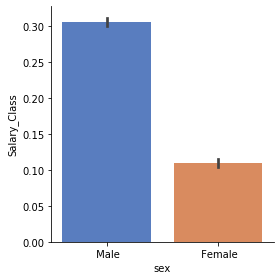

In [40]:
sns.catplot(x="sex",y="Salary_Class",data=train,kind="bar", height = 4, 
palette = "muted")

In [41]:
train['native_country'].fillna(train['native_country'].mode()[0], inplace=True)
test['native_country'].fillna(test['native_country'].mode()[0], inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

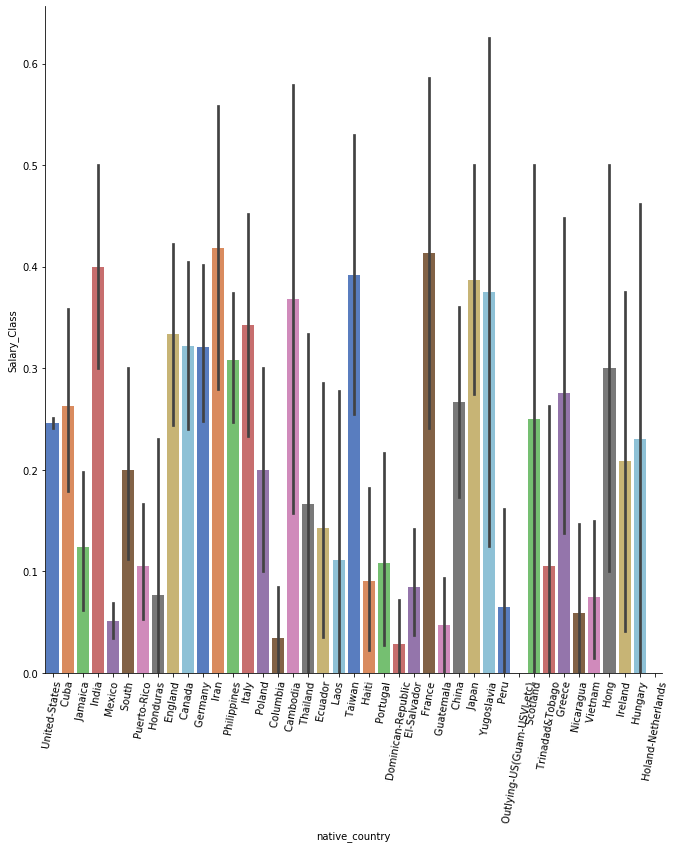

In [42]:
sns.catplot(x="native_country",y="Salary_Class",data=train,kind="bar", height = 10, 
palette = "muted")
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text xticklabel objects>)

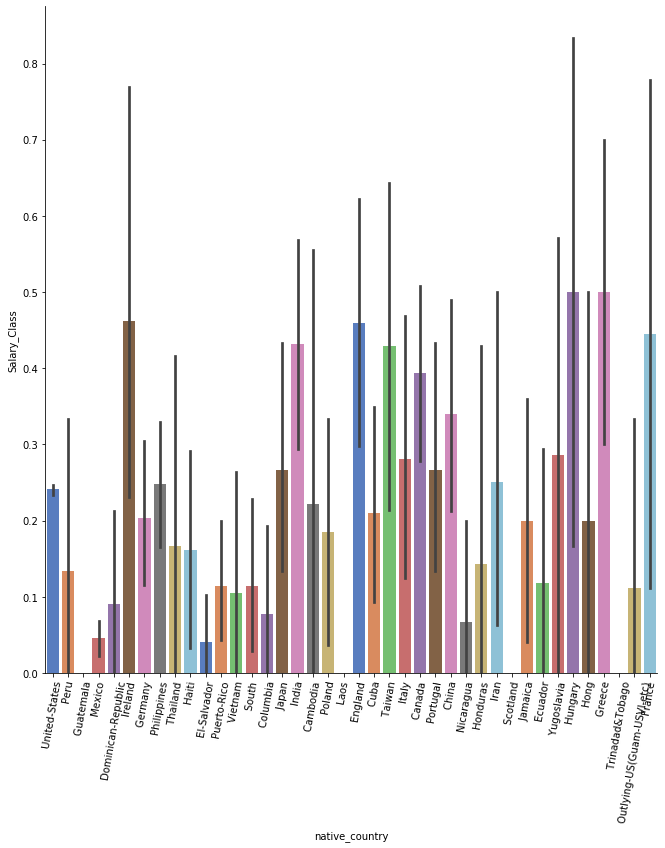

In [43]:
sns.catplot(x="native_country",y="Salary_Class",data=test,kind="bar", height = 10, 
palette = "muted")
plt.xticks(rotation=80)

In [44]:
def group_country(country):
    
    if country in [" Cambodia", " China", " Hong", " Laos", " Thailand"," Japan", " Taiwan", " Vietnam"," India", " Iran"]:
        return 'Asia'
 
    
    elif country in [" Cuba", " Guatemala", " Jamaica", " Nicaragua"," Puerto-Rico",  " Dominican-Republic", " El-Salvador", 
                     " Haiti", " Honduras", " Mexico", " Trinadad&Tobago", " Ecuador", " Peru", " Columbia"]:
        return 'Central_and South_America'
    
    elif country in [" England", " Germany", " Holand-Netherlands", " Ireland"," France", " Greece", 
                     " Italy", " Portugal", " Scotland"," Poland", " Yugoslavia", " Hungary"]:
        return 'Europe'
    
    else: 
        return 'US & Outlying'

In [45]:
train['native_country'] = train['native_country'].apply(group_country)
test['native_country'] = test['native_country'].apply(group_country)

In [46]:
train['native_country'].value_counts()

US & Outlying                30166
Central_and South_America     1401
Europe                         521
Asia                           473
Name: native_country, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

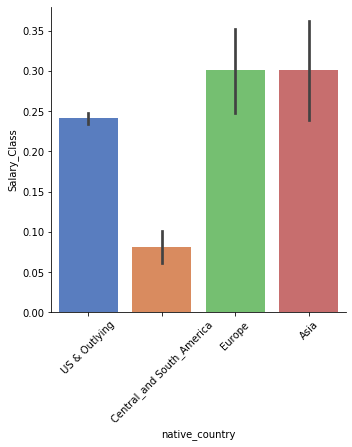

In [47]:
sns.catplot(x="native_country",y="Salary_Class",data=test,kind="bar", height = 5, 
palette = "muted")
plt.xticks(rotation=45)

In [48]:
df = pd.concat([train, test], axis=0)

In [49]:
df.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
Salary_Class        int32
dtype: object

In [50]:
categorical = df.select_dtypes(include=['object']).axes[1]

for col in categorical:
    print (col, df[col].nunique())

workclass 8
education 10
marital_status 6
occupation 14
relationship 6
race 5
sex 2
native_country 4


In [51]:
for col in categorical:
    df[col]=le.fit_transform(df[col])

In [52]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary_Class
0,39,6,11.258253,2,13,3,0,1,4,1,2174,0,40,3,0
1,50,5,11.330348,2,13,1,3,0,4,1,0,0,13,3,0
2,38,3,12.281398,4,9,0,5,1,4,1,0,0,40,3,0
3,53,3,12.366157,8,7,1,5,0,2,1,0,0,40,3,0
4,28,3,12.732013,2,13,1,9,5,2,0,0,0,40,1,0


In [53]:
train = df.head(train.shape[0])
test = df.tail(test.shape[0])

In [54]:
train_x = train.drop('Salary_Class', axis=1)
train_y = train['Salary_Class']

test_x = test.drop('Salary_Class', axis=1)
test_y = test['Salary_Class']

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [56]:
train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

# Modelling 


In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix,r2_score,mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

r2 Score is: 0.035565847241850745
RMSE: 0.4171408762715464
Confusion Matrix
 [[11669   766]
 [ 2067  1779]]
AUC_Score: 0.7004790903336977


<function matplotlib.pyplot.show(*args, **kw)>

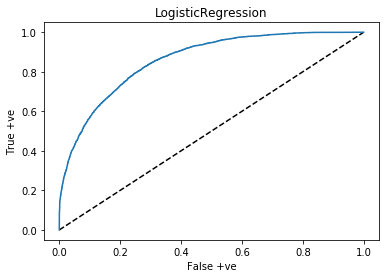

In [58]:
model=LogisticRegression()
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
print('r2 Score is:', r2_score(test_y,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(test_y,pred_y)))
print('Confusion Matrix\n',confusion_matrix(test_y,pred_y))
print('AUC_Score:',roc_auc_score(test_y,pred_y))
y_pred_prob=model.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('LogisticRegression')
plt.show

r2 Score is: -0.07643515390796618
RMSE: 0.44069730497488246
Confusion Matrix
 [[10820  1615]
 [ 1547  2299]]
AUC_Score: 0.7339442793634544
[0 0 1 ... 1 0 1]


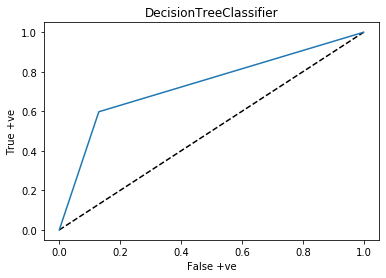

In [59]:
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
print('r2 Score is:', r2_score(test_y,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(test_y,pred_y)))
print('Confusion Matrix\n',confusion_matrix(test_y,pred_y))
print('AUC_Score:',roc_auc_score(test_y,pred_y))
y_pred_prob=model.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('DecisionTreeClassifier')
plt.show
print(pred_y)

r2 Score is: -0.07166915385903772
RMSE: 0.439720611947477
Confusion Matrix
 [[11778   657]
 [ 2491  1355]]
AUC_Score: 0.6497396759561577
[0 0 0 ... 0 1 0]


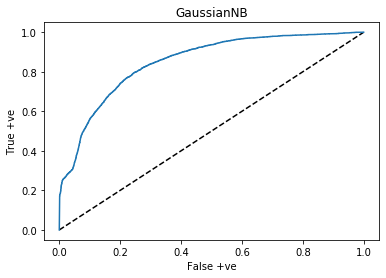

In [60]:
model=GaussianNB()
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
print('r2 Score is:', r2_score(test_y,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(test_y,pred_y)))
print('Confusion Matrix\n',confusion_matrix(test_y,pred_y))
print('AUC_Score:',roc_auc_score(test_y,pred_y))
y_pred_prob=model.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('GaussianNB')
plt.show
print(pred_y)

r2 Score is: 0.1724181343610799
RMSE: 0.3864131889983858
Confusion Matrix
 [[11548   887]
 [ 1544  2302]]
AUC_Score: 0.7636065104847861
[0 0 1 ... 1 0 1]


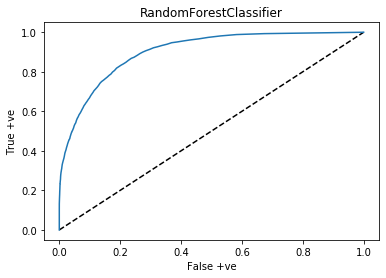

In [61]:
model=RandomForestClassifier()
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
print('r2 Score is:', r2_score(test_y,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(test_y,pred_y)))
print('Confusion Matrix\n',confusion_matrix(test_y,pred_y))
print('AUC_Score:',roc_auc_score(test_y,pred_y))
y_pred_prob=model.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('RandomForestClassifier')
plt.show
print(pred_y)

r2 Score is: 0.24356770652008208
RMSE: 0.3694294294051402
Confusion Matrix
 [[11825   610]
 [ 1612  2234]]
AUC_Score: 0.7659040740399218
[0 0 0 ... 1 0 1]


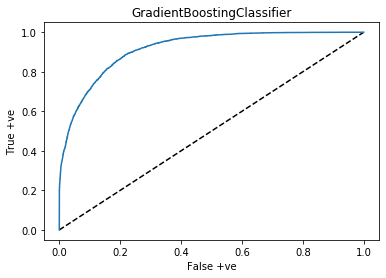

In [62]:
model=GradientBoostingClassifier()
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
print('r2 Score is:', r2_score(test_y,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(test_y,pred_y)))
print('Confusion Matrix\n',confusion_matrix(test_y,pred_y))
print('AUC_Score:',roc_auc_score(test_y,pred_y))
y_pred_prob=model.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('GradientBoostingClassifier')
plt.show
print(pred_y)

r2 Score is: 0.0896939906546802
RMSE: 0.4052659938438341
Confusion Matrix
 [[11603   832]
 [ 1842  2004]]
AUC_Score: 0.7270764606217541
[0 0 1 ... 1 1 1]


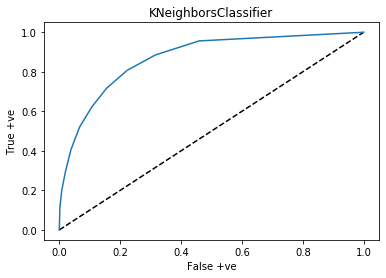

In [63]:
model=KNeighborsClassifier(n_neighbors=10)
model.fit(train_x,train_y)
pred_y=model.predict(test_x)
print('r2 Score is:', r2_score(test_y,pred_y))
print('RMSE:',np.sqrt(mean_squared_error(test_y,pred_y)))
print('Confusion Matrix\n',confusion_matrix(test_y,pred_y))
print('AUC_Score:',roc_auc_score(test_y,pred_y))
y_pred_prob=model.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False +ve')
plt.ylabel('True +ve')
plt.title('KNeighborsClassifier')
plt.show
print(pred_y)

# GradientBoostingClassifier Gives the best Results Comparatively

In [64]:
#END